# Lab 02. 윌콕슨 부호 순위 검정 간단 실습 02
---

- 환자의 치료 전과 후를 비교하여 효과성을 평가하는 코드를 작성해보자. 데이터는 랜덤 더미 데이터를 사용한다.

In [1]:
import numpy as np 
import pandas as pd 
from scipy.stats import wilcoxon

- 치료 전, 후의 데이터를 랜덤하게 생성한다.

In [2]:
pre_treatment = np.random.randint(1,10, size=20)
post_treatment = np.random.randint(-3,4, size=20)

# 데이터 프레임 
data  = pd.DataFrame({
    "pre_treatment" : pre_treatment,
    "post_treatment" : post_treatment
})

print(data)

data.to_csv("./data/treatment_data.csv", index=False, encoding='utf-8')

    pre_treatment  post_treatment
0               4               3
1               3               1
2               1               2
3               9               3
4               9               0
5               4              -3
6               7               1
7               7              -3
8               4              -3
9               8              -2
10              7              -3
11              7               0
12              4              -2
13              6               2
14              5              -2
15              3               2
16              5              -1
17              6              -3
18              1               3
19              2              -2


- 환자의 치료 전과 후를 비교하여 효과성을 평가해본다.

In [4]:
# data 가져오기
treatment_data = pd.read_csv("./data/treatment_data.csv")
# print(treatment_data)

# 월콕슨 부호 순위 검정 수행 
stat, p = wilcoxon(data['pre_treatment'], data['post_treatment'])

print(stat, p)

6.5 3.62396240234375e-05


In [5]:
if p > 0.05 : 
    print("fail to reject HO")
else : 
    print("reject HO")

reject HO


- 결과값을 시각화 해본다.

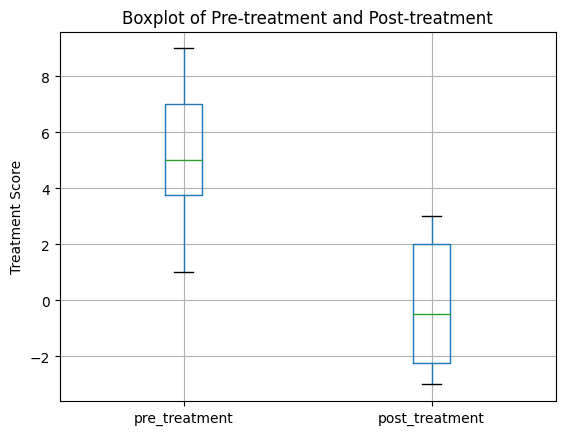

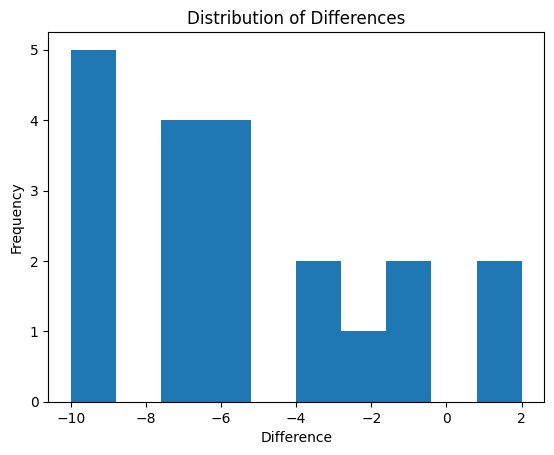

In [7]:
import matplotlib.pyplot as plt

# boxplot 그리기
fig, ax = plt.subplots()
data.boxplot(['pre_treatment', 'post_treatment'], ax=ax)
ax.set_title('Boxplot of Pre-treatment and Post-treatment')
ax.set_ylabel('Treatment Score')

plt.show()

# 두 변수의 차이에 대한 분포를 시각화
fig, ax = plt.subplots()
data['diff'] = data['post_treatment'] - data['pre_treatment']
ax.hist(data['diff'], bins=10)
ax.set_title('Distribution of Differences')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')

plt.show()